# Building your first text classifier with Python

This notebook is a part 2 for my NLP 101 article that covers basic text processing and analysis with python. I explain there how to load data into python using pandas, how to preprocess text with the help of stopword deletion, lemmatisation and stemming, and regular expressions. https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7

In this notebook I want to go a step further and apply some machine learning algorithms to text data in order to be able to classify it according to a given set of categories. I will use some basic NLP and machine learning concepts. This requires 0 maths knowledge, just common sense. 

We’ll first use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.

Then we will use one of my datasets I have acquired during my PhD which contains arguments from people who are reluctant to get a COVID-19 vaccine, should one be developed and relseased.

The motivation of this notebook is to encourage analysts who are not using Python or R for their work, to automate as much of their analysis as possible with the help of programming. An example would be an analyst for the police who is analysing incident reports and has to extract data manually. For instance, what type of incident it was, whether minors were involved and whether there were injuries or deaths. This data can be automatically extracted, as I have described in detail in my previous article and notebook. Now I want to go a step further and use machine learning in order to classify text into categories. The infamous analyst could train a classifier with the data that he already has and classify new incident reports that come in without having to read them or apply any hard-coded data extraction methods.

In [181]:
import pandas as pd

In [182]:
bbc_data = pd.read_csv("bbc-text.csv")

In [183]:
bbc_data = bbc_data[['category', 'text']]

In [184]:
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


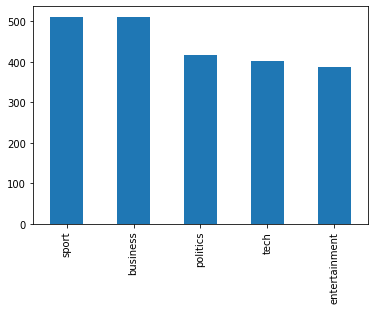

In [185]:
bbc_data['category'].value_counts().plot.bar()

As we can see it is a quite balanced dataset. With this sort of data, imbalanced in the dataset wouldn't be that problematic, but read this article if you are interestd in when imbalanced data can become a problem: https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import (
    train_test_split, StratifiedShuffleSplit,
    cross_val_score)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Baseline Classifier
Before we do anything with the data, lets split the data into train and test sets and run a multinomial naive bayes on the data. Naive Bayes is a popular algorithm, especially for NLP tasks. Check out this article where it's explained: https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vector = CountVectorizer()

#fit training data
training_data = count_vector.fit_transform(X_train)

#transform test data
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)


In [188]:
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))



accuracy: 0.9730337078651685


Wow - thats pretty good. But maybe we were lucky and got an "easy" 20% test set. Let's use cross validation to exclude that possibility

In [189]:
X_whole = count_vector.fit_transform(bbc_data['text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(naive_bayes, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.9755056179775281

It seems like even without any preprocessing we can get very good results. It seems like the features (words) in each category are similar enough within the category and distinct enough from other categories. Out of curiostiry lets create some word clouds to visualise it

In [190]:
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split())
        
      

In [191]:
sport_df = bbc_data[bbc_data['category'] == 'sport']
tech_df = bbc_data[bbc_data['category'] == 'tech']
pol_df = bbc_data[bbc_data['category'] == 'politics']

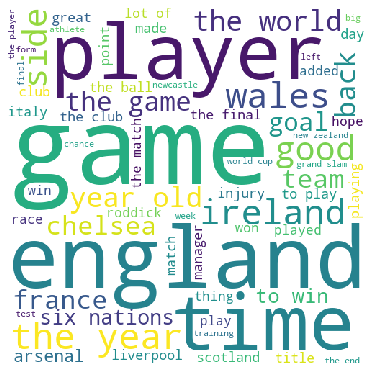

In [192]:
from wordcloud import WordCloud

bbc_words = '' 

for t in sport_df["text"]: 
      
    # typecaste each val to string 
    #val = str(val) 
  
    # split the value 
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

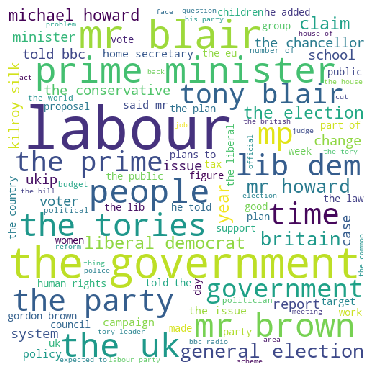

In [193]:
bbc_words = '' 

for t in pol_df["text"]: 
      
    # typecaste each val to string 
    #val = str(val) 
  
    # split the value 
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

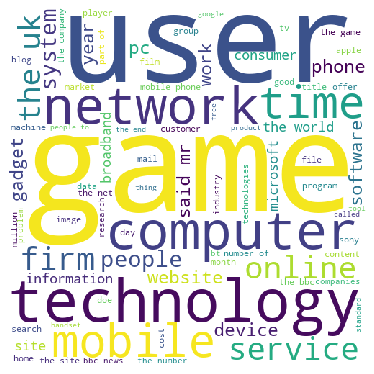

In [194]:
bbc_words = '' 

for t in tech_df["text"]: 
      
    # typecaste each val to string 
    #val = str(val) 
  
    # split the value 
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Well yea, we can see that it is quite easy to distinguish political from tech news articles.
That's why it's usefull to always train a classifier with the raw data first. I have seen countless blog posts where people jump right in and do a lot of fancy preprocessing to get 95% of accuracy and when you train the classifier without preprocessing, its the same 95%

## Let's use a different dataset
I will use my recently acquired small dataset of arguments people give against getting a potential COVID-19 vaccine. I am still in the process of writing the paper, once I have put it on arxiv, I will link it here. I have labelled the data partially automatically, partially manually. let's see how well the naive bayes does now

In [195]:
covid_data = pd.read_csv('covid_vacc_concerns.csv')

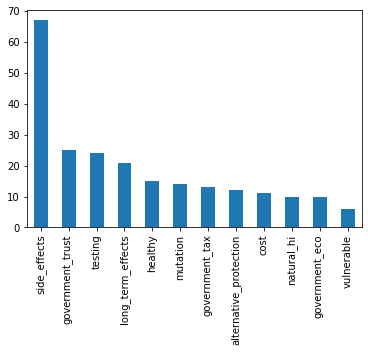

In [196]:
covid_data['concern'].value_counts().plot.bar()

In [197]:
covid_data[covid_data['concern'] == "side_effects"]

,arg_id,arg,concern
79,con_arg_80,Side effect may be worse than the virus itself...,side_effects
80,con_arg_81,If my risk for COVID is very low then I'll tak...,side_effects
81,con_arg_82,"But they're rushing it, how can we be sure the...",side_effects
82,con_arg_83,"How are they researched, what are the multiple...",side_effects
83,con_arg_84,"The side effects aren't known yet, and so you ...",side_effects
...,...,...,...
141,con_arg_142,"What about the safety of the vaccine though, w...",side_effects
142,con_arg_143,Yes but we can't be sure it's effective,side_effects
143,con_arg_144,I am unconvinced how effective the vaccine w...,side_effects
207,con_arg_208,I am scared it will negatively affect my healt...,side_effects


In [198]:
X_train, X_test, y_train, y_test = train_test_split(
    covid_data['arg'],
    covid_data['concern'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vector = CountVectorizer()

#fit training data
training_data = count_vector.fit_transform(X_train)

#transform test data
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)


In [103]:
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))


accuracy: 0.5434782608695652


Given we have 12 categories (12 concerns), 54% is not too bad. If we only had 2 categories, that would be as good as a random guess. But let's see whether we can get it up

In [199]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk import  word_tokenize
def preprocess(raw_text):
    
    #regular expression keeping only letters - more on them later
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = word_tokenize(letters_only_text.lower())
    

    cleaned_words = []
    lemmatizer = WordNetLemmatizer()
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.lemmatize(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [200]:
covid_data['prep_arg'] = covid_data['arg'].apply(preprocess)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    covid_data['prep_arg'],
    covid_data['concern'],
    test_size=0.2,
    random_state=50
)

#tfidf_vector = TfidfVectorizer()
count_vectorizer = CountVectorizer(binary=True)
#fit training data
training_data = count_vectorizer.fit_transform(X_train)

#transform test data
testing_data = count_vectorizer.transform(X_test)

naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)

print('accuracy: {}'.format(accuracy_score(y_test, predictions)))



accuracy: 0.7391304347826086


Aha, much better - 74% accuracy! But maybe we just got lucky. Let's apply cross-validation

In [202]:
X_whole = count_vector.fit_transform(covid_data['prep_arg'])
y_whole = covid_data['concern']
scores = cross_val_score(naive_bayes, X_whole, y_whole, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.6652173913043478

Oh well - but hey, over 10% increase in accuracy compared to the first one where we did not apply any preprocessing to the text. Let's check what arguments the classifier got wrong

In [203]:
predict_df = pd.DataFrame(X_test)

In [204]:
predict_df['concern'] = y_test

In [205]:

predict_df['pred'] = predictions

In [206]:
predict_df[predict_df['concern'] != predict_df['pred']]

,prep_arg,concern,pred
18,government business open kickstart economy rel...,government_eco,government_trust
184,trust vaccine developed fast young deal virus,healthy,side_effects
34,government made lot mistake understanding covi...,government_trust,side_effects
16,government care finding solution quick prevent...,government_eco,government_trust
1,vaccine expensive good,cost,side_effects
183,safe scared catching preexisting condition com...,healthy,side_effects
15,necessarily true lot company government act in...,government_eco,government_trust
200,maintain social distance ensure wash hand corr...,alternative_protection,mutation
69,vaccine long time analise side effect long ter...,long_term_effects,side_effects
8,vaccine expensive developed,cost,side_effects


It seems that the classifier struggles with the concerns regarding economic recovery and lack of trust into the government. this is not surprising since we have only very few samples of these.

### Let's use some other classification algorithms!
Thanks to scikit-learn this is easy.

## Logistic Regression

In [207]:
logistic_reg = LogisticRegression()
logistic_reg.fit(training_data,y_train)# predict the labels on validation dataset
predictions_log = logistic_reg.predict(testing_data)# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  78.26086956521739


In [209]:
# cross validation
scores = cross_val_score(logistic_reg, X_whole, y_whole, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.6978260869565218

## Decision Tree Classifier

In [210]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(training_data,y_train)# predict the labels on validation dataset
predictions_DTC = DTC.predict(testing_data)# Use accuracy_score function to get the accuracy
print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC, y_test)*100)

DTC Accuracy Score ->  76.08695652173914


In [211]:
scores = cross_val_score(DTC, X_whole, y_whole, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.6978260869565218

## Support Vector Machine

In [212]:
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(training_data,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(testing_data)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  80.43478260869566


In [213]:
scores = cross_val_score(SVM, X_whole, y_whole, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.6847826086956521

## (Vanilla) Neural Network

In [214]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [215]:
input_dim = training_data.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(50, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(12, activation='sigmoid'))

In [216]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                29100     
_________________________________________________________________
dense_5 (Dense)              (None, 12)                612       
Total params: 29,712
Trainable params: 29,712
Non-trainable params: 0
_________________________________________________________________


In [217]:
y_test_labels = y_test

In [218]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [219]:
encoder_dict = dict(zip( y_test,y_test_labels))

In [220]:
encoder_dict

{6: 'long_term_effects',
 9: 'side_effects',
 8: 'natural_hi',
 3: 'government_tax',
 2: 'government_eco',
 4: 'government_trust',
 5: 'healthy',
 0: 'alternative_protection',
 1: 'cost',
 7: 'mutation',
 10: 'testing',
 11: 'vulnerable'}

In [221]:
history = model.fit(training_data, y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(testing_data, y_test),
                     batch_size=10)

Epoch 1/30
19/19 [==============================] - 0s 6ms/step - loss: 2.4525 - accuracy: 0.1264 - val_loss: 2.4158 - val_accuracy: 0.2609
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 2.3688 - accuracy: 0.3462 - val_loss: 2.3638 - val_accuracy: 0.3913
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 2.2908 - accuracy: 0.4945 - val_loss: 2.3049 - val_accuracy: 0.4130
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 2.2056 - accuracy: 0.5824 - val_loss: 2.2385 - val_accuracy: 0.4130
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 2.1089 - accuracy: 0.5934 - val_loss: 2.1599 - val_accuracy: 0.5000
Epoch 6/30
19/19 [==============================] - 0s 2ms/step - loss: 1.9969 - accuracy: 0.5549 - val_loss: 2.0679 - val_accuracy: 0.4565
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 1.8673 - accuracy: 0.5330 - val_loss: 1.9678 - val_accuracy: 0.4130
Epoch 8/30
19/19 [==

In [222]:
loss, accuracy = model.evaluate(training_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testing_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7826


## New Data

In [223]:
new_data= ['i am concerned about the side effects of the vaccine', 
           'the government doesnt care about our health, it will be pushing for a vaccine just to overcome the recession even if it\'s unsafe',
           'I\'d rather avoid large gatherings and continue using masks and social distancing than getting a vaccine',
           'I am not against vaccines in general but I do not want to inject myself with a new one',
           'There is no way to tell long term consequences without the vaccine being tested for years']

In [224]:
new_data_prep = []
for arg in new_data:
    arg_prep = preprocess(arg)
    new_data_prep.append(arg_prep)

In [225]:
new_data_trans = count_vectorizer.transform(new_data_prep)

In [226]:
# Naive Bayes
predictions_new_data = naive_bayes.predict(new_data_trans)
predictions_new_data

array(['side_effects', 'government_trust', 'alternative_protection',
       'side_effects', 'long_term_effects'], dtype='<U22')

In [228]:
#SVM
SVM.predict(new_data_trans)

array(['side_effects', 'government_trust', 'alternative_protection',
       'side_effects', 'long_term_effects'], dtype=object)

In [229]:
preds_nn = model.predict_classes(new_data_trans)

In [230]:
preds_nn

array([ 9,  4,  0,  9, 10])

In [231]:
for i in preds_nn:
    print(encoder_dict[i])

side_effects
government_trust
alternative_protection
side_effects
testing
